In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
#Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [3]:
#Create Dummy Variables
geography = pd.get_dummies(X['Geography'],drop_first = True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [4]:
#Concatenate the Data Frames
X = pd.concat([X,geography,gender],axis=1)

In [5]:
## Drop Unnecessary columns
X = X.drop(['Geography','Gender'],axis=1)

In [6]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
# Part 2 - Now let's make the ANN!
# Importing the Keras libraries and packages

import keras 

from keras.models import Sequential # For creating a Neural Network
from keras.layers import Dense  # for generally adding the hidden layers and also the input layer
from keras.layers import Dropout # Regularization parameter

In [17]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)



Epoch 1/100
536/536 [==============================] - 3s 6ms/step - loss: 0.7066 - accuracy: 0.6044 - val_loss: 0.5928 - val_accuracy: 0.7770
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5562 - accuracy: 0.7931 - val_loss: 0.5453 - val_accuracy: 0.7940
Epoch 3/100
536/536 [==============================] - 3s 5ms/step - loss: 0.5282 - accuracy: 0.7962 - val_loss: 0.5273 - val_accuracy: 0.7944
Epoch 4/100
536/536 [==============================] - 3s 6ms/step - loss: 0.5130 - accuracy: 0.7962 - val_loss: 0.5154 - val_accuracy: 0.7944
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.5020 - accuracy: 0.7964 - val_loss: 0.5065 - val_accuracy: 0.7944
Epoch 6/100
536/536 [==============================] - 2s 5ms/step - loss: 0.4930 - accuracy: 0.7960 - val_loss: 0.4989 - val_accuracy: 0.7944
Epoch 7/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4856 - accuracy: 0.7959 - val_loss: 0.4927 - val_accuracy: 0.7959

Epoch 58/100
536/536 [==============================] - 6s 11ms/step - loss: 0.3512 - accuracy: 0.8539 - val_loss: 0.3735 - val_accuracy: 0.8425
Epoch 59/100
536/536 [==============================] - 5s 8ms/step - loss: 0.3499 - accuracy: 0.8552 - val_loss: 0.3723 - val_accuracy: 0.8436
Epoch 60/100
536/536 [==============================] - 5s 8ms/step - loss: 0.3487 - accuracy: 0.8554 - val_loss: 0.3713 - val_accuracy: 0.8440
Epoch 61/100
536/536 [==============================] - 5s 10ms/step - loss: 0.3474 - accuracy: 0.8559 - val_loss: 0.3705 - val_accuracy: 0.8444
Epoch 62/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3463 - accuracy: 0.8561 - val_loss: 0.3690 - val_accuracy: 0.8451
Epoch 63/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3453 - accuracy: 0.8565 - val_loss: 0.3681 - val_accuracy: 0.8466
Epoch 64/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3443 - accuracy: 0.8571 - val_loss: 0.3671 - val_accurac

In [18]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


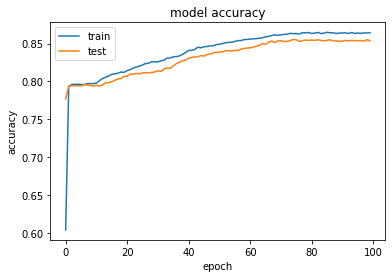

In [19]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

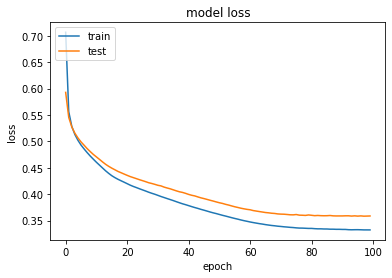

In [20]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [26]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8625